In [1]:
#GPU- Acceleration
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

2026-02-05 06:25:29.486359: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading Image Data

In [2]:
# Importing Libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
df=pd.read_csv("HAM10000_metadata.csv")
df

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

In [4]:
os.listdir("Skin Cancer")

['ISIC_0024394.jpg',
 'ISIC_0030042.jpg',
 'ISIC_0033640.jpg',
 'ISIC_0029758.jpg',
 'ISIC_0031217.jpg',
 'ISIC_0031047.jpg',
 'ISIC_0026859.jpg',
 'ISIC_0026043.jpg',
 'ISIC_0032485.jpg',
 'ISIC_0026471.jpg',
 'ISIC_0029754.jpg',
 'ISIC_0029309.jpg',
 'ISIC_0030676.jpg',
 'ISIC_0024627.jpg',
 'ISIC_0029149.jpg',
 'ISIC_0028617.jpg',
 'ISIC_0029745.jpg',
 'ISIC_0030933.jpg',
 'ISIC_0025767.jpg',
 'ISIC_0033260.jpg',
 'ISIC_0033366.jpg',
 'ISIC_0027705.jpg',
 'ISIC_0025899.jpg',
 'ISIC_0024438.jpg',
 'ISIC_0025912.jpg',
 'ISIC_0032108.jpg',
 'ISIC_0029333.jpg',
 'ISIC_0032104.jpg',
 'ISIC_0029586.jpg',
 'ISIC_0025566.jpg',
 'ISIC_0031489.jpg',
 'ISIC_0027818.jpg',
 'ISIC_0024406.jpg',
 'ISIC_0029293.jpg',
 'ISIC_0027045.jpg',
 'ISIC_0031085.jpg',
 'ISIC_0032259.jpg',
 'ISIC_0028999.jpg',
 'ISIC_0033340.jpg',
 'ISIC_0026876.jpg',
 'ISIC_0033530.jpg',
 'ISIC_0025380.jpg',
 'ISIC_0024557.jpg',
 'ISIC_0025113.jpg',
 'ISIC_0028519.jpg',
 'ISIC_0029562.jpg',
 'ISIC_0033223.jpg',
 'ISIC_002636

In [5]:
z='ISIC_0033005.jpg'

z.split(".")[0]

'ISIC_0033005'

In [6]:
img_paths={} # mapping filenames to paths

for x in os.listdir("Skin Cancer"):
    img_paths[x.split(".")[0]]="Skin Cancer/"+x

img_paths

{'ISIC_0024394': 'Skin Cancer/ISIC_0024394.jpg',
 'ISIC_0030042': 'Skin Cancer/ISIC_0030042.jpg',
 'ISIC_0033640': 'Skin Cancer/ISIC_0033640.jpg',
 'ISIC_0029758': 'Skin Cancer/ISIC_0029758.jpg',
 'ISIC_0031217': 'Skin Cancer/ISIC_0031217.jpg',
 'ISIC_0031047': 'Skin Cancer/ISIC_0031047.jpg',
 'ISIC_0026859': 'Skin Cancer/ISIC_0026859.jpg',
 'ISIC_0026043': 'Skin Cancer/ISIC_0026043.jpg',
 'ISIC_0032485': 'Skin Cancer/ISIC_0032485.jpg',
 'ISIC_0026471': 'Skin Cancer/ISIC_0026471.jpg',
 'ISIC_0029754': 'Skin Cancer/ISIC_0029754.jpg',
 'ISIC_0029309': 'Skin Cancer/ISIC_0029309.jpg',
 'ISIC_0030676': 'Skin Cancer/ISIC_0030676.jpg',
 'ISIC_0024627': 'Skin Cancer/ISIC_0024627.jpg',
 'ISIC_0029149': 'Skin Cancer/ISIC_0029149.jpg',
 'ISIC_0028617': 'Skin Cancer/ISIC_0028617.jpg',
 'ISIC_0029745': 'Skin Cancer/ISIC_0029745.jpg',
 'ISIC_0030933': 'Skin Cancer/ISIC_0030933.jpg',
 'ISIC_0025767': 'Skin Cancer/ISIC_0025767.jpg',
 'ISIC_0033260': 'Skin Cancer/ISIC_0033260.jpg',
 'ISIC_0033366': 'Sk

In [7]:
df["img_path"]=df["image_id"].map(img_paths)
df

lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

                           img_path  
0      Skin Cancer/ISIC_0027419.jpg  
1      Skin Cancer/ISIC_0025030.jpg  
2      Skin Cancer/ISIC_0026769.jpg  
3      Skin Cancer/ISIC_0025661.jpg  
4      Skin Cancer/ISIC_0031633.jpg  
...                             ...  
10010  Skin Cancer/ISIC_0033084.jpg  
10011  Skin Cancer/ISIC_0033550.jpg  
10012  Skin Cancer/ISIC_0033536.jpg  
10013  Skin Cancer/ISIC_0032854.jpg  
10014  Skin Cancer/ISIC_0032258.jpg  

[10015 rows x 8 columns]

In [8]:
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
img_path         0
dtype: int64

## EDA

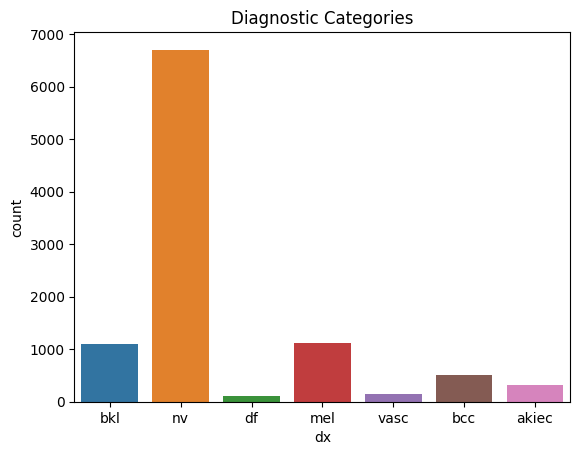

In [9]:
sns.countplot(x=df["dx"],hue=df["dx"])
plt.title("Diagnostic Categories")
plt.show()

- Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec),
- basal cell carcinoma (bcc),
- benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl),
- dermatofibroma (df),
- melanoma (mel),
- melanocytic nevi (nv) and
- vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).

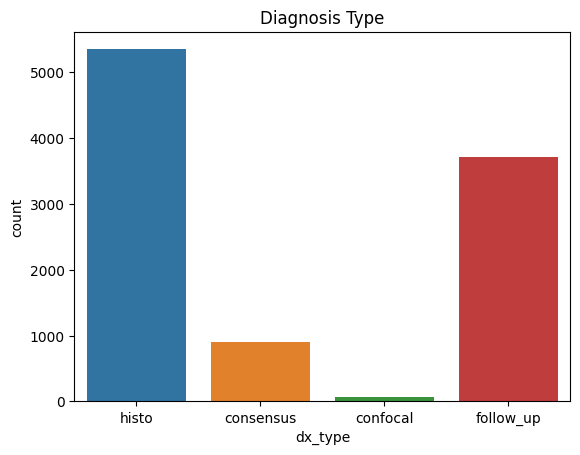

In [10]:
sns.countplot(x=df["dx_type"],hue=df["dx_type"])
plt.title("Diagnosis Type")
plt.show()

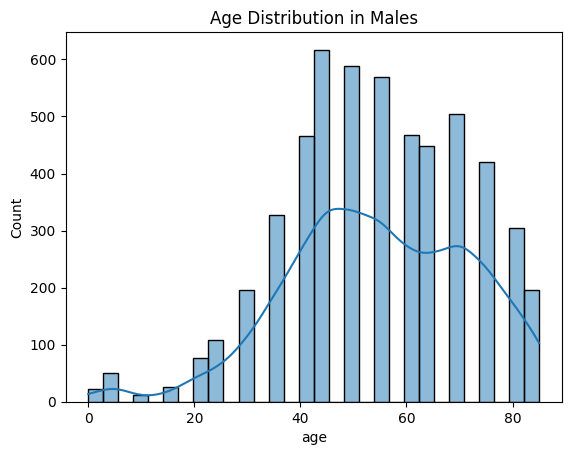

In [11]:
sns.histplot(data=df[df["sex"]=="male"],x=df[df["sex"]=="male"]["age"],kde=True)
plt.title("Age Distribution in Males")
plt.show()

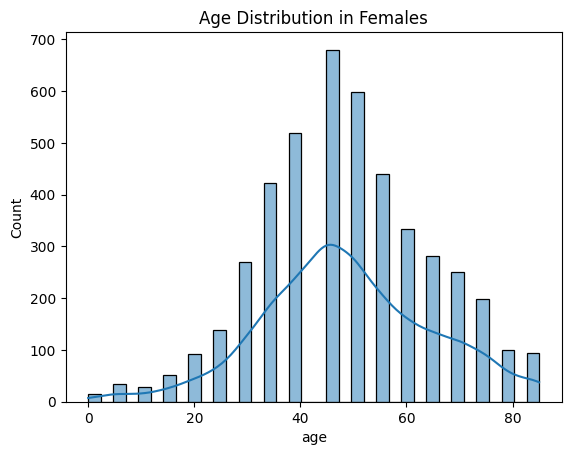

In [12]:
sns.histplot(data=df[df["sex"]=="female"],x=df[df["sex"]=="female"]["age"],kde=True)
plt.title("Age Distribution in Females")
plt.show()

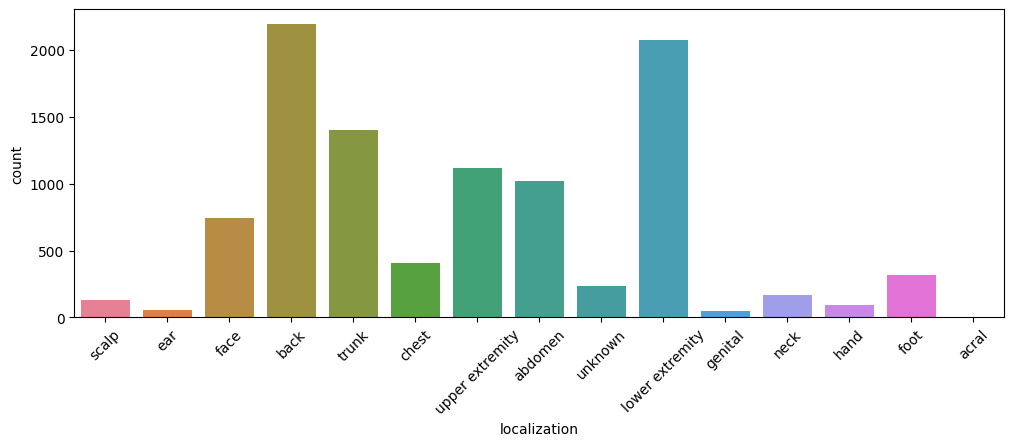

In [13]:
plt.figure(figsize=(12,4))
sns.countplot(x=df["localization"],hue=df["localization"])
plt.xticks(rotation=45)
plt.show()

In [14]:
df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'img_path'],
      dtype='object')

In [15]:
for g,k in df.groupby("lesion_id"):
    print(g,len(k))

HAM_0000000 2
HAM_0000001 1
HAM_0000002 3
HAM_0000003 1
HAM_0000004 1
HAM_0000005 4
HAM_0000006 3
HAM_0000007 1
HAM_0000008 1
HAM_0000009 3
HAM_0000010 1
HAM_0000011 1
HAM_0000012 2
HAM_0000013 1
HAM_0000014 3
HAM_0000015 1
HAM_0000016 1
HAM_0000017 1
HAM_0000018 1
HAM_0000019 1
HAM_0000020 1
HAM_0000021 1
HAM_0000022 1
HAM_0000023 1
HAM_0000024 1
HAM_0000025 3
HAM_0000026 1
HAM_0000027 1
HAM_0000028 2
HAM_0000029 1
HAM_0000030 1
HAM_0000031 1
HAM_0000032 1
HAM_0000033 1
HAM_0000034 1
HAM_0000035 1
HAM_0000036 1
HAM_0000037 1
HAM_0000038 1
HAM_0000039 1
HAM_0000040 1
HAM_0000041 1
HAM_0000042 3
HAM_0000043 1
HAM_0000044 2
HAM_0000045 1
HAM_0000046 1
HAM_0000047 1
HAM_0000048 2
HAM_0000049 1
HAM_0000050 2
HAM_0000051 1
HAM_0000052 1
HAM_0000053 1
HAM_0000054 2
HAM_0000055 1
HAM_0000056 1
HAM_0000057 2
HAM_0000058 1
HAM_0000059 2
HAM_0000060 2
HAM_0000061 1
HAM_0000062 1
HAM_0000063 1
HAM_0000064 3
HAM_0000065 2
HAM_0000066 1
HAM_0000067 2
HAM_0000068 2
HAM_0000069 1
HAM_0000070 2
HAM_00

In [16]:
df["dx"].value_counts(normalize=True)*100

dx
nv       66.949576
mel      11.113330
bkl      10.973540
bcc       5.132302
akiec     3.265102
vasc      1.417873
df        1.148278
Name: proportion, dtype: float64

In [17]:
df["dx_type"].value_counts()

dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64

In [18]:
df[df["dx_type"]=="histo"]["dx"].value_counts()

dx
nv       2498
mel      1113
bkl       766
bcc       514
akiec     327
vasc       67
df         55
Name: count, dtype: int64

In [19]:
df["image_id"].duplicated().sum()

np.int64(0)

In [20]:
df=df[df["dx_type"]=="histo"] # Excluding ambiguos diagonistic categories for high quality labels
df

lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

                           img_path  
0      Skin Cancer/ISIC_0027419.jpg  
1      Skin Cancer/ISIC_0025030.jpg  
2      Skin Cancer/ISIC_0026769.jpg  
3      Skin Cancer/ISIC_0025661.jpg  
4      Skin Cancer/ISIC_0031633.jpg  
...                             ...  
10010  Skin Cancer/ISIC_0033084.jpg  
10011  Skin Cancer/ISIC_0033550.jpg  
10012  Skin Cancer/ISIC_0033536.jpg  
10013  Skin Cancer/ISIC_0032854.jpg  
10014  Skin Cancer/ISIC_0032258.jpg  

[5340 rows x 8 columns]

In [21]:
malignant = ["mel", "bcc", "akiec"] # Cancer categories

df["label"] = df["dx"].isin(malignant).astype("int32")


/tmp/ipykernel_30012/1203961615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["dx"].isin(malignant).astype("int32")


In [22]:
df["label"].value_counts()

label
0    3386
1    1954
Name: count, dtype: int64

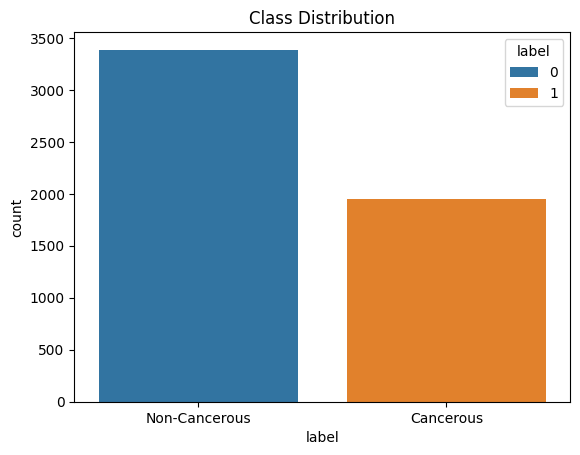

In [23]:
sns.countplot(x=df["label"],hue=df["label"])
plt.title("Class Distribution")
plt.xticks(ticks=[0,1],labels=["Non-Cancerous","Cancerous"])
plt.show()

In [24]:
df["label"]=df["label"].astype(str)

/tmp/ipykernel_30012/1758237290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"]=df["label"].astype(str)


In [25]:
df["label"].dtype

dtype('O')

## Train, Test, Val Splitting

In [26]:
from sklearn.model_selection import StratifiedGroupKFold

In [27]:
sgf=StratifiedGroupKFold(n_splits=5,shuffle=False) # to prevent data leakage

train_idx,test_idx=next(sgf.split(df["img_path"],df["label"],groups=df["lesion_id"]))

In [28]:
train_df=df.iloc[train_idx].reset_index(drop=True)
test_df=df.iloc[test_idx].reset_index(drop=True)

In [29]:
train_df

lesion_id      image_id     dx dx_type   age     sex localization  \
0     HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
1     HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
2     HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
3     HAM_0001466  ISIC_0027850    bkl   histo  75.0    male          ear   
4     HAM_0002761  ISIC_0029176    bkl   histo  60.0    male         face   
...           ...           ...    ...     ...   ...     ...          ...   
4267  HAM_0001576  ISIC_0033705  akiec   histo  60.0    male         face   
4268  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
4269  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
4270  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
4271  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

                          img_path label  
0     Skin Cancer/ISIC_0026769.jpg     0  
1     Skin Cancer/ISIC_0025661.jpg     0  
2     Skin Cancer/ISIC_0031633.jpg     0  
3     Skin Cancer/ISIC_0027850.jpg     0  
4     Skin Cancer/ISIC_0029176.jpg     0  
...                            ...   ...  
4267  Skin Cancer/ISIC_0033705.jpg     1  
4268  Skin Cancer/ISIC_0033084.jpg     1  
4269  Skin Cancer/ISIC_0033550.jpg     1  
4270  Skin Cancer/ISIC_0033536.jpg     1  
4271  Skin Cancer/ISIC_0032258.jpg     1  

[4272 rows x 9 columns]

In [30]:
train_df["label"].value_counts()

label
0    2708
1    1564
Name: count, dtype: int64

In [31]:
test_df["label"].value_counts()

label
0    678
1    390
Name: count, dtype: int64

In [32]:
# Creating Validation dataset for monitoring model performance during training
sgf_val=StratifiedGroupKFold(n_splits=5,shuffle=False)
train_idx_1,val_idx=next(sgf_val.split(train_df["img_path"],train_df["label"],groups=train_df["lesion_id"]))

train_data=train_df.iloc[train_idx_1].reset_index(drop=True)
val_data=train_df.iloc[val_idx].reset_index(drop=True)

In [33]:
train_data["label"].value_counts()

label
0    2166
1    1251
Name: count, dtype: int64

In [34]:
val_data["label"].value_counts()

label
0    542
1    313
Name: count, dtype: int64

In [35]:
test_df["label"].value_counts()

label
0    678
1    390
Name: count, dtype: int64

In [36]:
d=train_df["dx"].unique()
d

array(['bkl', 'df', 'mel', 'vasc', 'bcc', 'nv', 'akiec'], dtype=object)

In [37]:
train_df[train_df["dx"]=="bkl"]["img_path"].sample(1).values[0]

'Skin Cancer/ISIC_0025659.jpg'

### Dataset Visualization

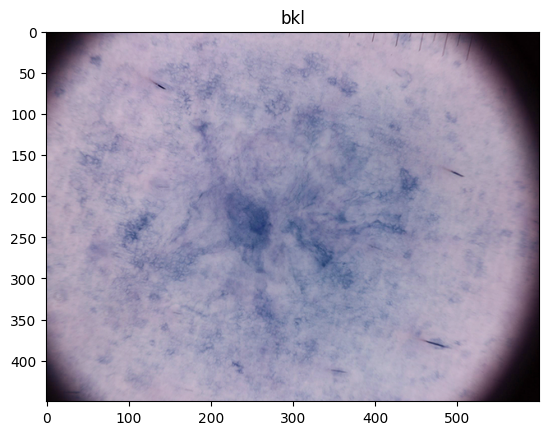

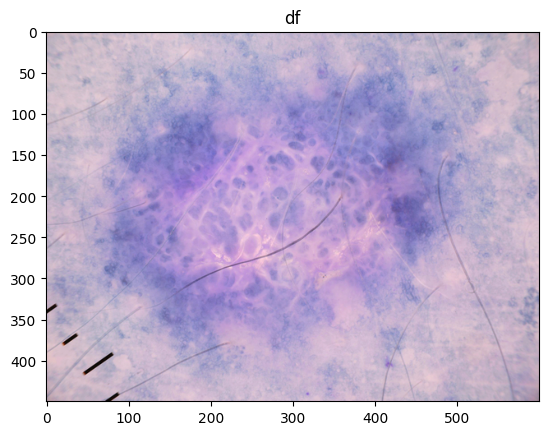

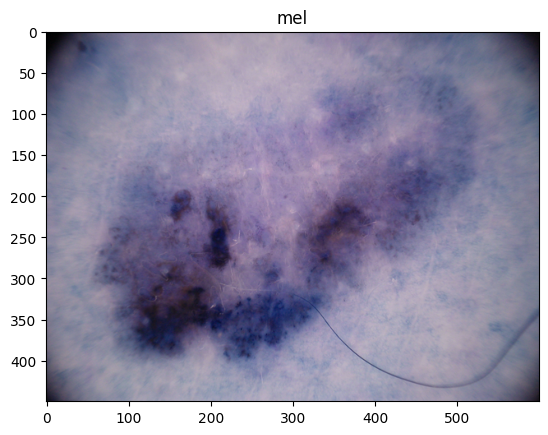

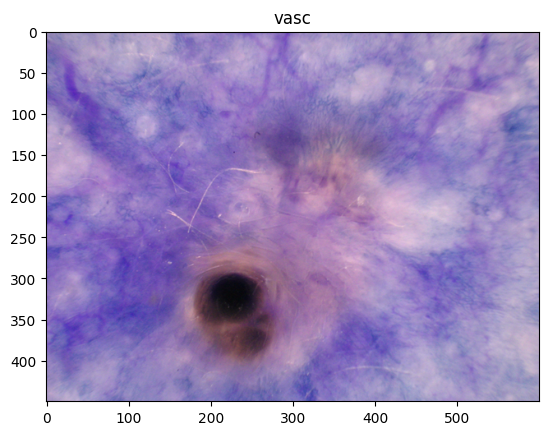

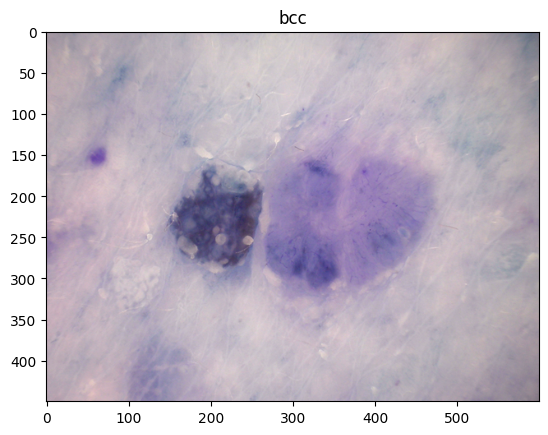

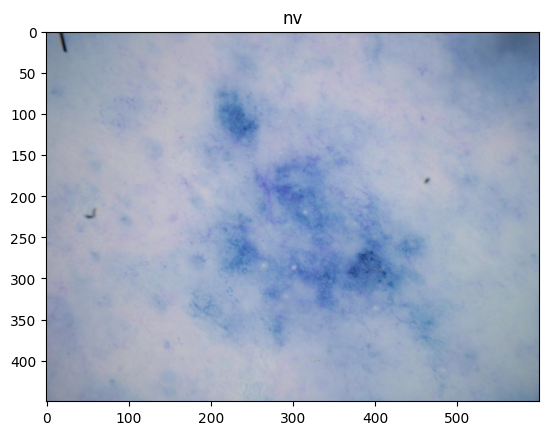

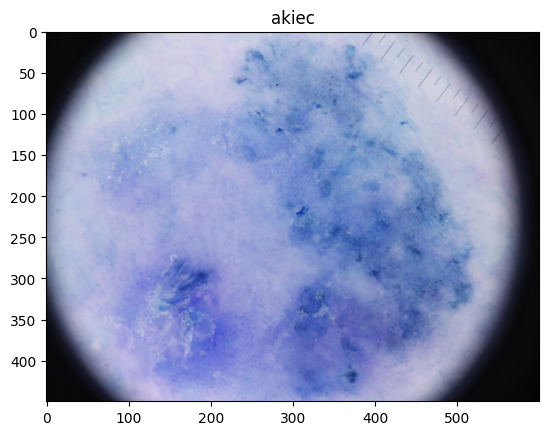

In [38]:
for disease in d:
    img_path=train_df[train_df["dx"]==disease]["img_path"].sample(1).values[0]
    img=cv2.imread(img_path)
    plt.imshow(img)
    plt.title(f"{disease}")
    plt.show()

In [39]:
train_df.head(1)

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   

                       img_path label  
0  Skin Cancer/ISIC_0026769.jpg     0

### Image Pipeline

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D,Dense,Dropout,BatchNormalization
from keras.applications.efficientnet import preprocess_input

In [41]:
# Augmented Train Dataset
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=12,
    zoom_range=0.05,

    horizontal_flip=True,
    vertical_flip=True
)
resolution=(224,224)
batch_size=16

train_generator=train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col="img_path",
    y_col="label",
    target_size=resolution,
    batch_size=batch_size,
    class_mode="binary",
    color_mode="rgb",
    shuffle=True
)

# Un-Augmented Validation and Test dataset

val_test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator=val_test_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col="img_path",
    y_col="label",
    target_size=resolution,
    batch_size=batch_size,
    class_mode="binary",
    color_mode="rgb",
    shuffle=False
)

test_generator=val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="img_path",
    y_col="label",
    target_size=resolution,
    batch_size=batch_size,
    class_mode="binary",
    color_mode="rgb",
    shuffle=False
)

Found 3417 validated image filenames belonging to 2 classes.
Found 855 validated image filenames belonging to 2 classes.
Found 1068 validated image filenames belonging to 2 classes.


In [42]:
train_data["label"].value_counts()

label
0    2166
1    1251
Name: count, dtype: int64

In [43]:
image,label=next(train_generator)
print(image.shape)

(16, 224, 224, 3)


In [44]:
# Checking if indicies are matched with labels
print(train_generator.class_indices)

{'0': 0, '1': 1}


In [45]:
print(train_data.index[:20])

RangeIndex(start=0, stop=20, step=1)


In [46]:
# Computed class weights using total/2* count of class
class_weights={0:0.79,1:1.37}

In [47]:
base_model=tf.keras.applications.EfficientNetB0(input_shape=(*resolution,3),include_top=False,weights="imagenet")


I0000 00:00:1770272741.753515   30012 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1751 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [ ]:
# -------- PHASE 1: train head only (feature extraction)--------
base_model.trainable = False

inputs = tf.keras.Input(shape=(*resolution,3))

x = base_model(inputs, training=False)   # VERY IMPORTANT
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer=Adam(1e-4),
    loss="binary_crossentropy",
    metrics=[
    tf.keras.metrics.AUC(curve="ROC", name="roc_auc"),
    tf.keras.metrics.AUC(curve="PR", name="pr_auc")
]
)

model.fit(train_generator,epochs=7)


Epoch 1/7


2026-02-05 06:25:56.144137: I external/local_xla/xla/service/service.cc:163] XLA service 0x7eebe0002f10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-02-05 06:25:56.144190: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2026-02-05 06:25:56.491575: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-02-05 06:25:58.236116: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


  1/214 ━━━━━━━━━━━━━━━━━━━━ 1:27:23 25s/step - loss: 1.0992 - pr_auc: 0.4604 - roc_auc: 0.3810

I0000 00:00:1770272772.280708   30111 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


214/214 ━━━━━━━━━━━━━━━━━━━━ 74s 230ms/step - loss: 0.7224 - pr_auc: 0.4912 - roc_auc: 0.6373
Epoch 2/7
214/214 ━━━━━━━━━━━━━━━━━━━━ 31s 145ms/step - loss: 0.6510 - pr_auc: 0.5769 - roc_auc: 0.7089
Epoch 3/7
214/214 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - loss: 0.5978 - pr_auc: 0.6270 - roc_auc: 0.7501
Epoch 4/7
214/214 ━━━━━━━━━━━━━━━━━━━━ 31s 145ms/step - loss: 0.5793 - pr_auc: 0.6472 - roc_auc: 0.7624
Epoch 5/7
214/214 ━━━━━━━━━━━━━━━━━━━━ 31s 146ms/step - loss: 0.5442 - pr_auc: 0.6861 - roc_auc: 0.7848
Epoch 6/7
214/214 ━━━━━━━━━━━━━━━━━━━━ 32s 150ms/step - loss: 0.5341 - pr_auc: 0.6969 - roc_auc: 0.7955
Epoch 7/7
214/214 ━━━━━━━━━━━━━━━━━━━━ 34s 159ms/step - loss: 0.5370 - pr_auc: 0.6916 - roc_auc: 0.7933


In [49]:
x, y = next(train_generator)

print(x.shape)
print(x.min(), x.max())


(16, 224, 224, 3)
2.305588 255.0


In [50]:
print(len(base_model.layers))

238


In [51]:
# -------- PHASE 2: fine-tune backbone --------
for layer in base_model.layers[-80:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True



model.compile(optimizer=Adam(2e-5),
    loss="binary_crossentropy",
    metrics=[
    tf.keras.metrics.AUC(curve="ROC", name="roc_auc"),
    tf.keras.metrics.AUC(curve="PR", name="pr_auc")
]
)
early=tf.keras.callbacks.EarlyStopping(monitor="val_pr_auc",mode="max",patience=5,min_delta=0.002,restore_best_weights=True)

model.fit(train_generator,validation_data=val_generator,epochs=10, callbacks=[early],class_weight=class_weights)


Epoch 1/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 0.5156 - pr_auc: 0.7415 - roc_auc: 0.8327

2026-02-05 06:32:04.997271: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng51{k2=2,k13=0,k14=2,k18=1,k23=0} for conv (f16[7,7,7,1152]{3,2,1,0}, u8[0]{0}) custom-call(f16[7,7,7,192]{3,2,1,0}, f16[1152,1,1,192]{3,2,1,0}), window={size=1x1}, dim_labels=b01f_o01i->b01f, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]} is taking a while...
2026-02-05 06:32:04.999654: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 2.045376499s
Trying algorithm eng51{k2=2,k13=0,k14=2,k18=1,k23=0} for conv (f16[7,7,7,1152]{3,2,1,0}, u8[0]{0}) custom-call(f16[7,7,7,192]{3,2,1,0}, f16[1152,1,1,192]{3,2,1,0}), window={size=1x1}, dim_labels=b01f_o01i->b01f, custom_call_target="__cudnn$convForward", backend_config=

214/214 ━━━━━━━━━━━━━━━━━━━━ 108s 365ms/step - loss: 0.5331 - pr_auc: 0.7316 - roc_auc: 0.8221 - val_loss: 0.6101 - val_pr_auc: 0.6796 - val_roc_auc: 0.7785
Epoch 2/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 40s 187ms/step - loss: 0.5127 - pr_auc: 0.7530 - roc_auc: 0.8320 - val_loss: 0.5894 - val_pr_auc: 0.6906 - val_roc_auc: 0.7896
Epoch 3/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 40s 184ms/step - loss: 0.4913 - pr_auc: 0.7641 - roc_auc: 0.8430 - val_loss: 0.5703 - val_pr_auc: 0.6927 - val_roc_auc: 0.7973
Epoch 4/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 42s 197ms/step - loss: 0.4532 - pr_auc: 0.8018 - roc_auc: 0.8689 - val_loss: 0.5664 - val_pr_auc: 0.6975 - val_roc_auc: 0.8059
Epoch 5/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - loss: 0.4496 - pr_auc: 0.8013 - roc_auc: 0.8706 - val_loss: 0.5540 - val_pr_auc: 0.6884 - val_roc_auc: 0.7957
Epoch 6/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 40s 188ms/step - loss: 0.4335 - pr_auc: 0.8265 - roc_auc: 0.8816 - val_loss: 0.5632 - val_pr_auc: 0.6930 - val_roc_auc: 0.7984
Epoch 7/

In [52]:
y_proba=model.predict(test_generator).ravel()
y_proba

67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 290ms/step


array([0.3743, 0.6143, 0.623 , ..., 0.5337, 0.0529, 0.8096],
      shape=(1068,), dtype=float16)

In [53]:
y_true=test_generator.labels
y_true

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [54]:
from sklearn.metrics import average_precision_score,f1_score,recall_score,precision_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,precision_recall_curve

In [55]:
# Threshold-tuning
f1=[]
pr=[]
prau=[]
re=[]
thresh=np.arange(0,1.01,0.01)

for x in thresh:
  y_thresh=(y_proba>x).astype(int)
  f1.append(f1_score(y_true,y_thresh))
  pr.append(precision_score(y_true,y_thresh))
  re.append(recall_score(y_true,y_thresh))
  prau.append(average_precision_score(y_true,y_proba))


/home/abhi/miniforge3/envs/tf_2026/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


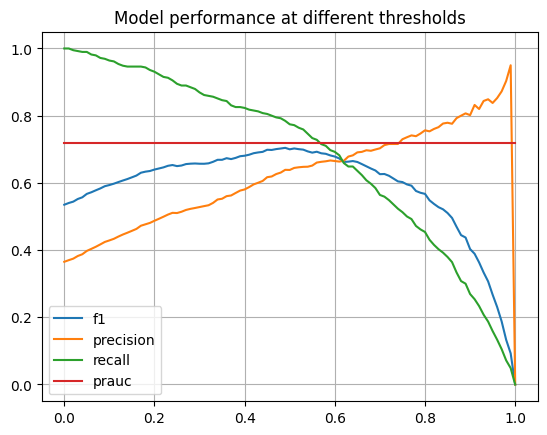

In [56]:
plt.plot(thresh,f1,label="f1")
plt.plot(thresh,pr,label="precision")
plt.plot(thresh,re,label="recall")
plt.plot(thresh,prau,label="prauc")
plt.title("Model performance at different thresholds")
plt.legend()
plt.grid(True)
plt.show()

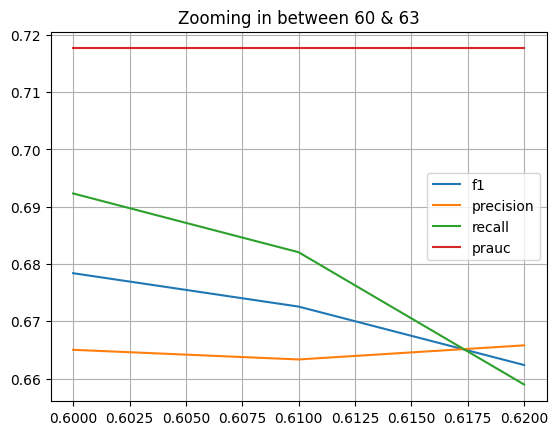

In [62]:
ul,ll=60,63
plt.plot(thresh[ul:ll],f1[ul:ll],label="f1")
plt.plot(thresh[ul:ll],pr[ul:ll],label="precision")
plt.plot(thresh[ul:ll],re[ul:ll],label="recall")
plt.plot(thresh[ul:ll],prau[ul:ll],label="prauc")
plt.title(f"Zooming in between {ul} & {ll}")
plt.legend()
plt.grid(True)
plt.show()

In [58]:
print("Test")
print("PR Score: ",average_precision_score(y_true,y_proba))
print("ROC-AUC Score: ",roc_auc_score(y_true,y_proba))

Test
PR Score:  0.7176084213121152
ROC-AUC Score:  0.818856364874064


In [59]:
tr_pred=model.predict(train_generator).ravel()
y_train=train_generator.labels

214/214 ━━━━━━━━━━━━━━━━━━━━ 38s 176ms/step


In [60]:
val_pred=model.predict(val_generator).ravel()
y_val=val_generator.labels

54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step


# METRICS

In [95]:
print("Train")
print("PR-AUC: ",average_precision_score(y_train,tr_pred))
print("ROC-AUC: ",roc_auc_score(y_train,tr_pred))
print("----")
print("Validation")
print("PR-AUC: ",average_precision_score(y_val,val_pred))
print("ROC-AUC: ",roc_auc_score(y_val,val_pred))
print("-----")
print("Test")
print("PR Score: ",average_precision_score(y_true,y_proba))
print("ROC-AUC Score: ",roc_auc_score(y_true,y_proba))

Train
PR-AUC:  0.3634918734465568
ROC-AUC:  0.4946611501196089
----
Validation
PR-AUC:  0.7186595864405347
ROC-AUC:  0.8133525105219104
-----
Test
PR Score:  0.7176084213121152
ROC-AUC Score:  0.818856364874064


In [63]:
best_thresh=0.61

y_lab=(y_proba>best_thresh).astype(int)

print(classification_report(y_true,y_lab))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       678
           1       0.66      0.68      0.67       390

    accuracy                           0.76      1068
   macro avg       0.74      0.74      0.74      1068
weighted avg       0.76      0.76      0.76      1068



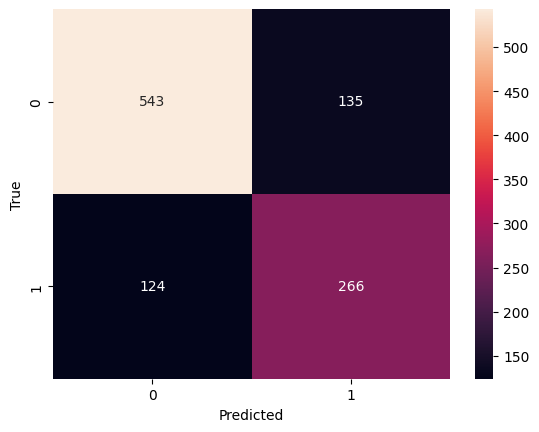

In [64]:
cm=confusion_matrix(y_true,y_lab)
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [65]:
print("Test")
print("PR-AUC: ",average_precision_score(y_true,y_proba))
print("ROC-AUC: ",roc_auc_score(y_true,y_proba))

Test
PR-AUC:  0.7176084213121152
ROC-AUC:  0.818856364874064


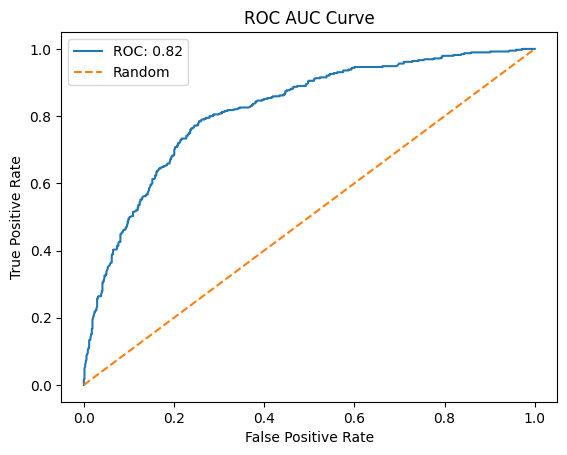

In [66]:
fpr,tpr,thresholds=roc_curve(y_true,y_proba)
plt.plot(fpr,tpr,label=f"ROC: {roc_auc_score(y_true,y_proba):.2f}")
plt.plot([0,1],[0,1],linestyle="--",label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall Curve')

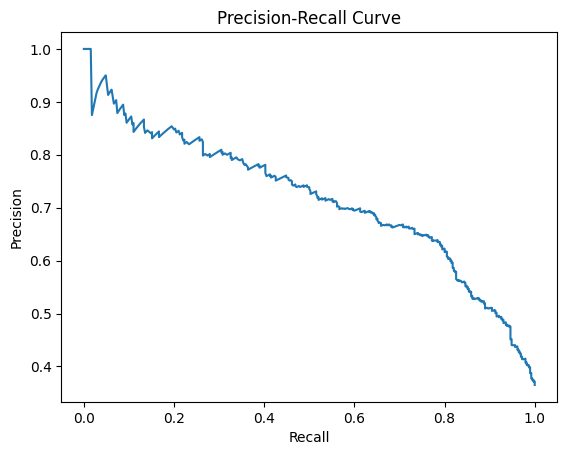

In [67]:
precision, recall, _ = precision_recall_curve(y_true, y_proba)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

# Grad-Cam

In [68]:
last_conv_layer_name = None
for layer in reversed(base_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

print(f"Targeting internal layer: {last_conv_layer_name}")

Targeting internal layer: top_conv


In [69]:
actual_disease=test_df[(y_lab==1)]
actual_disease=actual_disease[actual_disease["label"]=="1"]
actual_disease=actual_disease["img_path"].tolist()
actual_disease

['Skin Cancer/ISIC_0030623.jpg',
 'Skin Cancer/ISIC_0032248.jpg',
 'Skin Cancer/ISIC_0028445.jpg',
 'Skin Cancer/ISIC_0029081.jpg',
 'Skin Cancer/ISIC_0025744.jpg',
 'Skin Cancer/ISIC_0029281.jpg',
 'Skin Cancer/ISIC_0031642.jpg',
 'Skin Cancer/ISIC_0024729.jpg',
 'Skin Cancer/ISIC_0031711.jpg',
 'Skin Cancer/ISIC_0025234.jpg',
 'Skin Cancer/ISIC_0029000.jpg',
 'Skin Cancer/ISIC_0026754.jpg',
 'Skin Cancer/ISIC_0030445.jpg',
 'Skin Cancer/ISIC_0025603.jpg',
 'Skin Cancer/ISIC_0031941.jpg',
 'Skin Cancer/ISIC_0024315.jpg',
 'Skin Cancer/ISIC_0028442.jpg',
 'Skin Cancer/ISIC_0027238.jpg',
 'Skin Cancer/ISIC_0029571.jpg',
 'Skin Cancer/ISIC_0025927.jpg',
 'Skin Cancer/ISIC_0031890.jpg',
 'Skin Cancer/ISIC_0029216.jpg',
 'Skin Cancer/ISIC_0026489.jpg',
 'Skin Cancer/ISIC_0028878.jpg',
 'Skin Cancer/ISIC_0034006.jpg',
 'Skin Cancer/ISIC_0029726.jpg',
 'Skin Cancer/ISIC_0030824.jpg',
 'Skin Cancer/ISIC_0028489.jpg',
 'Skin Cancer/ISIC_0027260.jpg',
 'Skin Cancer/ISIC_0027604.jpg',
 'Skin Can

In [70]:
normal=test_df[y_lab==0]
normal=normal[normal["label"]=="0"]
normal=normal["img_path"].tolist()
normal

['Skin Cancer/ISIC_0027419.jpg',
 'Skin Cancer/ISIC_0032129.jpg',
 'Skin Cancer/ISIC_0024324.jpg',
 'Skin Cancer/ISIC_0029559.jpg',
 'Skin Cancer/ISIC_0029301.jpg',
 'Skin Cancer/ISIC_0026637.jpg',
 'Skin Cancer/ISIC_0030377.jpg',
 'Skin Cancer/ISIC_0029288.jpg',
 'Skin Cancer/ISIC_0031008.jpg',
 'Skin Cancer/ISIC_0029289.jpg',
 'Skin Cancer/ISIC_0029912.jpg',
 'Skin Cancer/ISIC_0030189.jpg',
 'Skin Cancer/ISIC_0025388.jpg',
 'Skin Cancer/ISIC_0028080.jpg',
 'Skin Cancer/ISIC_0026153.jpg',
 'Skin Cancer/ISIC_0025876.jpg',
 'Skin Cancer/ISIC_0025906.jpg',
 'Skin Cancer/ISIC_0027151.jpg',
 'Skin Cancer/ISIC_0033400.jpg',
 'Skin Cancer/ISIC_0033677.jpg',
 'Skin Cancer/ISIC_0033262.jpg',
 'Skin Cancer/ISIC_0032688.jpg',
 'Skin Cancer/ISIC_0033195.jpg',
 'Skin Cancer/ISIC_0033252.jpg',
 'Skin Cancer/ISIC_0032570.jpg',
 'Skin Cancer/ISIC_0033379.jpg',
 'Skin Cancer/ISIC_0033438.jpg',
 'Skin Cancer/ISIC_0032983.jpg',
 'Skin Cancer/ISIC_0034024.jpg',
 'Skin Cancer/ISIC_0034103.jpg',
 'Skin Can

In [85]:
def get_gradcam_heatmap(model, img_tensor, last_conv_name):

    # Access last conv directly from full model
    base_model=model.get_layer("efficientnetb0")
    last_conv_layer = base_model.get_layer(last_conv_name)

    # Create gradient model
    grad_model = tf.keras.Model(
    inputs=base_model.input,
    outputs=[last_conv_layer.output, base_model.output])

    with tf.GradientTape() as tape:

        inputs = preprocess_input(img_tensor)

        conv_outputs, predictions = grad_model(inputs, training=False)

        loss = predictions[:, 0]

    # Compute gradients
    grads = tape.gradient(loss, conv_outputs)

    # Channel importance
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    conv_outputs = conv_outputs[0]

    # Weighted sum
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    # ReLU
    heatmap = tf.maximum(heatmap, 0)

    # Normalize
    heatmap /= (tf.reduce_max(heatmap) + 1e-8)

    return heatmap.numpy()


In [86]:
def display_gradcam(img_path, heatmap, alpha=0.4):
    # 1. Load the original image from the path
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    t_img=img

    # 2. Rescale heatmap to a range of 0-255 (unsigned 8-bit integer)
    heatmap_uint8 = np.uint8(255 * heatmap)

    # 3. Use the 'jet' colormap to colorize the heatmap
    # In 'jet', red is high intensity, blue is low intensity
    jet = plt.get_cmap("jet")

    # 4. Map the intensity values to RGB colors
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap_uint8]

    # 5. Resize the small heatmap (e.g., 7x7) to match original X-ray size
    jet_heatmap = cv2.resize(jet_heatmap, (img.shape[1], img.shape[0]))
    jet_heatmap = np.uint8(jet_heatmap * 255)

    # 6. Superimpose (blend) the heatmap onto the original image
    # Result = (Heatmap * alpha) + (Original * (1 - alpha))
    superimposed_img = img * (1 - alpha) + jet_heatmap * alpha
    superimposed_img = np.uint8(superimposed_img)

    # 7. Create the side-by-side subplot display
    t_img=cv2.resize(t_img,resolution)
    t_img = np.expand_dims(t_img, axis=0)
    t_img=preprocess_input(t_img)


    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    pred = model.predict(t_img, verbose=0)[0][0]
    title="Cancer" if pred>best_thresh else "Normal"

    # Plot Original
    ax[0].imshow(img)
    ax[0].set_title(f"{title}")
    ax[0].axis("off")

    # Plot Grad-CAM Overlay
    ax[1].imshow(superimposed_img)
    ax[1].set_title("Grad-CAM Visualization")
    ax[1].axis("off")

    plt.tight_layout()
    plt.show()

In [87]:
len(actual_disease),len(normal)

(266, 543)

In [89]:
_ = model(tf.zeros((1,224,224,3)))

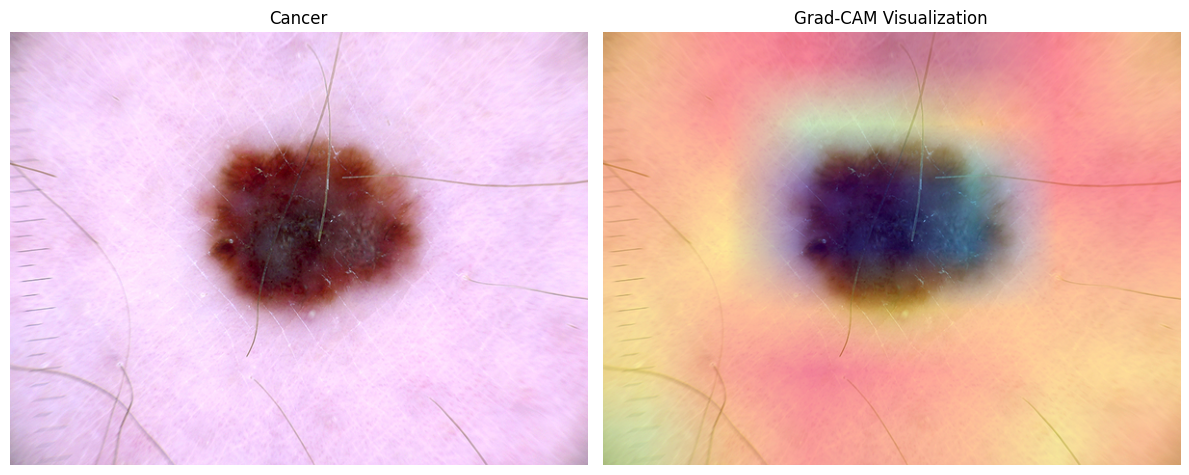

In [98]:
img_path = actual_disease[10]
img = tf.keras.preprocessing.image.load_img(img_path, target_size=resolution)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_array, axis=0)

# Generate and Plot
heatmap = get_gradcam_heatmap(model, img_tensor, last_conv_layer_name)
display_gradcam(img_path, heatmap)

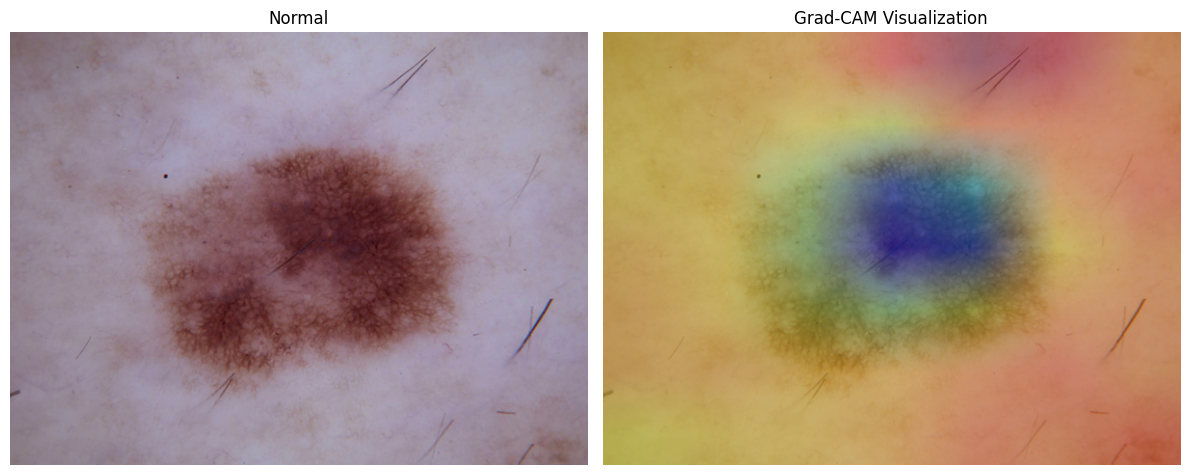

In [99]:
img_path = normal[500]
img = tf.keras.preprocessing.image.load_img(img_path, target_size=resolution)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_array, axis=0)

# Generate and Plot
heatmap = get_gradcam_heatmap(model, img_tensor, last_conv_layer_name)
display_gradcam(img_path, heatmap)

In [96]:
model.save("skin_cancer_detector.keras")